In [1]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
%matplotlib inline

Creating a model with 3 inputs and 2 target variables. We have a hidden layer with 2 nodes. Both layers, the input layer and the hidden layer have a bias node.

Initializing weights and biases

In [2]:
epochs = 10000

#Initializing the weights
w1,w2,w3,w4,w5,w6,w7,w8,w9,w10 = 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1
wlist = [w1,w2,w3,w4,w5,w6,w7,w8,w9,w10]
print(wlist)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.1]


In [3]:
#Intializing biases
b1,b2 = 0.5,0.5
blist = [b1,b2]
print(blist)

[0.5, 0.5]


In [4]:
#Input variables
x1,x2,x3 = 1,4,5
xlist = [x1,x2,x3]
print(xlist)

[1, 4, 5]


In [5]:
#Target values
t1,t2 = 0.1, 0.05
tlist = [t1,t2]
print(tlist)

[0.1, 0.05]


Defining learning rate, activation function and error. 
We are using sigmoid activation and mean squared error as error function

In [6]:
alpha = 0.01

def sigmoid(x):
  return(np.divide(1,(1+np.exp(-x))))

def error(original_list, tlist):
  return(0.5* (np.power(original_list[0]-tlist[0],2) + np.power(original_list[1]-tlist[1],2)))


Defining Forward Propagation

In [7]:
# we assign alternate weights to input variables for proper training
def forwardProp(xlist, wlist, blist):
  zh1 = wlist[0]*xlist[0] + wlist[2]*xlist[1] + wlist[4]*xlist[2]
  zh2 = wlist[1]*xlist[0] + wlist[3]*xlist[1] + wlist[5]*xlist[2]

  h1 = sigmoid(zh1)
  h2 = sigmoid(zh2)

  z1 = wlist[6]*h1 + wlist[8]*h2 + blist[0]
  z2 = wlist[7]*h1 + wlist[9]*h2 + blist[1]

  o1 = sigmoid(z1)
  o2 = sigmoid(z2)

  return(h1,h2,o1,o2)

Backpropagation and training

In [8]:
errlist = []
for i in range(epochs):
  h1,h2,o1,o2 = forwardProp(xlist,wlist,blist)
  sse = error([o1,o2],tlist)
  errlist.append(sse)

  print('epoch no. = {} \n output1 = {}, output2 = {}, error = {}'.format(i+1,o1,o2,sse))

  #computing d(error)/dw7
  dE_do1 = o1 - t1
  do1_dz1 = o1*(1-o1)
  dz1_dw7 = h1
  dE_dw7 = dE_do1 * do1_dz1 * dz1_dw7

  #computing d(error)/dw8
  dE_do2 = o2 - t2
  do2_dz2 = o2*(1-o2)
  dz2_dw8 = h2
  dE_dw8 = dE_do2 * do2_dz2 * dz2_dw8

  # computing d(error)/dw9 and d(error)/dw10
  dz1_dw9 = h2
  dE_dw9 = dE_do1 * do1_dz1 * dz1_dw9
  dz2_dw10 = h2
  dE_dw10 = dE_do2 * do2_dz2 * dz2_dw10


  # Compute d(Error)/db2
  dz1_db2 = 1
  dz2_db2 = 1
  dE_db2 = dE_do1* do1_dz1* dz1_db2+ dE_do2* do2_dz2* dz2_db2 
  
  # Compute d(Error)/dh1 
  dz1_dh1= w7
  dz2_dh1 = w8
  dE_dh1 = dE_do1* do1_dz1* dz1_dh1+ dE_do2* do2_dz2* dz2_dh1

  # Compute d(Error)/dw1 
  dh1_dzh1 = h1*(1-h1)
  dzh1_dw1 = x1
  dE_dw1 =  dE_dh1* dh1_dzh1* dzh1_dw1

  # Compute d(Error)/dw3
  dzh1_dw3 = x2
  dE_dw3= dE_dh1* dh1_dzh1* dzh1_dw3

  # Compute d(Error)/dws
  dzh1_dw5 = x3
  dE_dw5= dE_dh1* dh1_dzh1* dzh1_dw5 
  
  # Compute d(Error)/dh2 first
  dz1_dh2 = w9
  dz2_dh2 = w10
  dE_dh2 = dE_do1* do1_dz1* dz1_dh2 + dE_do2* do2_dz2 * dz2_dh2

  # Compute d(Error)/dw2
  dh2_dzh2 =  h2*(1 - h2)
  dzh2_dw2 = x1
  dE_dw2 = dE_dh2* dh2_dzh2 * dzh2_dw2 

  # Compute d(Error)/dw4
  dzh2_dw4=x2
  dE_dw4 = dE_dh2* dh2_dzh2* dzh2_dw4

  # Compute d(Error)/dw6
  dzh2_dw6 = x3
  dE_dw6 = dE_dh2* dh2_dzh2* dzh2_dw6

  # Compute d(Error)/db1
  dzh1_db1 = 1
  dzh2_db1 = 1
  term1 = dE_do1* do1_dz1* dz1_dh1* dh1_dzh1* dzh1_db1
  term2 = dE_do2* do2_dz2* dz2_dh2* dh2_dzh2* dzh2_db1
  dE_db1 = term1 + term2
  
  #Updating all parameters
  w1 = w1 - alpha * dE_dw1
  w2 = w2 - alpha * dE_dw2
  w3 = w3 - alpha * dE_dw3
  w4 = w4 - alpha * dE_dw4
  w5 = w5 - alpha * dE_dw5
  w6 = w6 - alpha * dE_dw6
  w7 = w7 - alpha * dE_dw7
  w8 = w8 - alpha * dE_dw8
  w9 = w9 - alpha * dE_dw9
  w10 = w10 - alpha * dE_dw10
  b1 = b1 - alpha * dE_db1
  b2 = b2 - alpha * dE_db2
  wlist = [w1,w2,w3,w4,w5,w6,w7,w8,w9,w10]
  blist = [b1,b2]

Streaming output truncated to the last 5000 lines.
epoch no. = 7501 
 output1 = 0.12280288155268936, output2 = 0.04833179870824178, error = 0.000261377151327902
epoch no. = 7502 
 output1 = 0.1227977112663277, output2 = 0.048330772409228076, error = 0.0002612609798663195
epoch no. = 7503 
 output1 = 0.12279254252405765, output2 = 0.04832974649048035, error = 0.00026114487074851934
epoch no. = 7504 
 output1 = 0.12278737532524117, output2 = 0.04832872095184407, error = 0.0002610288239351075
epoch no. = 7505 
 output1 = 0.12278220966924093, output2 = 0.04832769579316479, error = 0.0002609128393867267
epoch no. = 7506 
 output1 = 0.12277704555541964, output2 = 0.04832667101428819, error = 0.0002607969170640424
epoch no. = 7507 
 output1 = 0.12277188298314042, output2 = 0.04832564661505998, error = 0.0002606810569277499
epoch no. = 7508 
 output1 = 0.12276672195176698, output2 = 0.04832462259532601, error = 0.0002605652589385802
epoch no. = 7509 
 output1 = 0.12276156246066308, output2 = 0

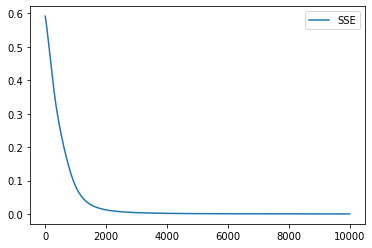

In [9]:
pd.DataFrame(errlist, columns = ['SSE']).plot()

Building the same model using keras

In [10]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim =3, activation = 'relu'))
model.add(Dense(2))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])
his = model.fit([xlist],[tlist],epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 0s 496ms/step - loss: 4.1363 - accuracy: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.0635 - accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.9916 - accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.9206 - accuracy: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.8503 - accuracy: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.7810 - accuracy: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.7124 - accuracy: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.6448 - accuracy: 1.0000
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.5780 - accuracy: 1.0000
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.5121 - accuracy: 1.0000
Epoch 11/1000
1/1

In [11]:
print(his.history.keys())

dict_keys(['loss', 'accuracy'])


<function matplotlib.pyplot.plot>

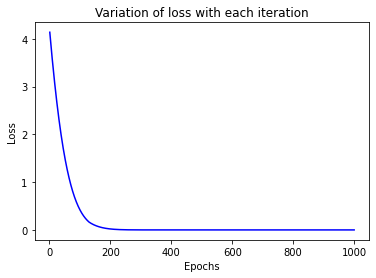

In [12]:
loss_values = his.history['loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label = 'Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Variation of loss with each iteration')
plt.plot